# Python Code to Plot Class-Conditional PDFs

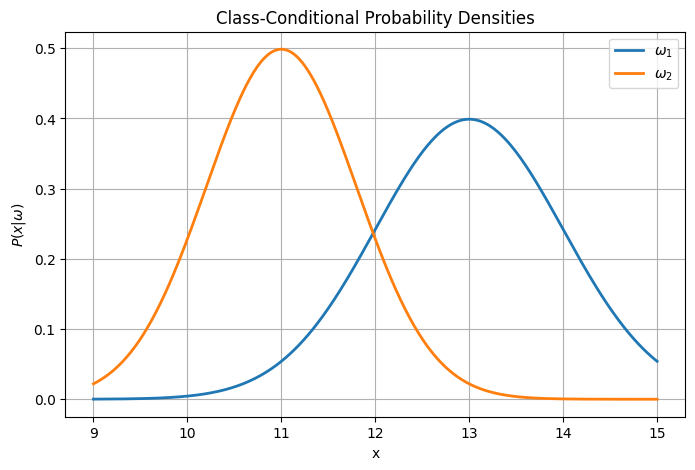

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the range of x values
x = np.linspace(9, 15, 500)

# Define two normal distributions for class-conditional densities
# ω1: mean=13, std=1
# ω2: mean=11, std=0.8

p_x_given_w1 = norm.pdf(x, loc=13, scale=1)
p_x_given_w2 = norm.pdf(x, loc=11, scale=0.8)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, p_x_given_w1, label=r'$\omega_1$', linewidth=2)
plt.plot(x, p_x_given_w2, label=r'$\omega_2$', linewidth=2)

plt.xlabel("x")
plt.ylabel(r"$P(x|\omega)$")
plt.title("Class-Conditional Probability Densities")
plt.legend()
plt.grid(True)
plt.show()


# ✅ Enhanced Python Code with Decision Boundary and Regions

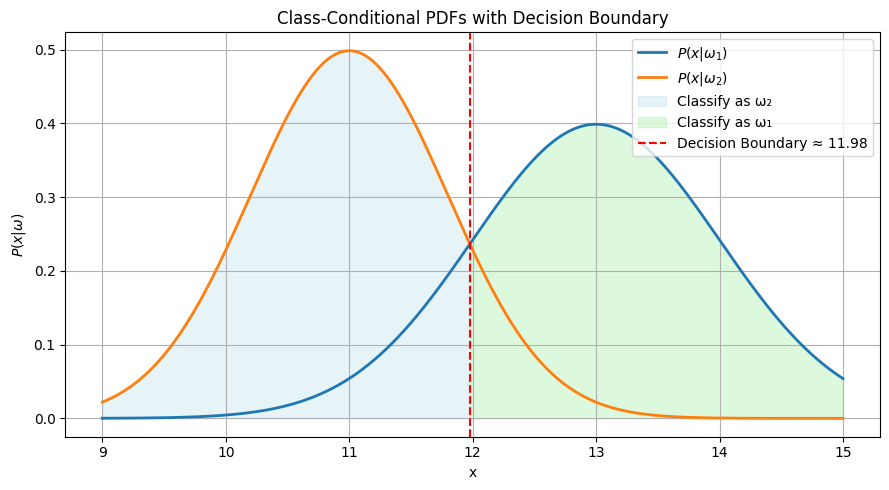

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the range of x values
x = np.linspace(9, 15, 1000)

# Class-conditional PDFs
p_x_given_w1 = norm.pdf(x, loc=13, scale=1)
p_x_given_w2 = norm.pdf(x, loc=11, scale=0.8)

# Find decision boundary where both PDFs are equal
diff = np.abs(p_x_given_w1 - p_x_given_w2)
decision_index = np.argmin(diff)
decision_boundary = x[decision_index]

# Plot PDFs
plt.figure(figsize=(9, 5))
plt.plot(x, p_x_given_w1, label=r'$P(x|\omega_1)$', linewidth=2)
plt.plot(x, p_x_given_w2, label=r'$P(x|\omega_2)$', linewidth=2)

# Fill decision regions
plt.fill_between(x, 0, np.maximum(p_x_given_w1, p_x_given_w2),
                 where=(x <= decision_boundary), color='lightblue', alpha=0.3, label='Classify as ω₂')
plt.fill_between(x, 0, np.maximum(p_x_given_w1, p_x_given_w2),
                 where=(x > decision_boundary), color='lightgreen', alpha=0.3, label='Classify as ω₁')

# Plot decision boundary
plt.axvline(decision_boundary, color='red', linestyle='--', label=f'Decision Boundary ≈ {decision_boundary:.2f}')

# Labels and title
plt.xlabel("x")
plt.ylabel(r"$P(x|\omega)$")
plt.title("Class-Conditional PDFs with Decision Boundary")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Full Code with Posterior Probabilities + Decision Region + Boundary (assuming equal prior prob)

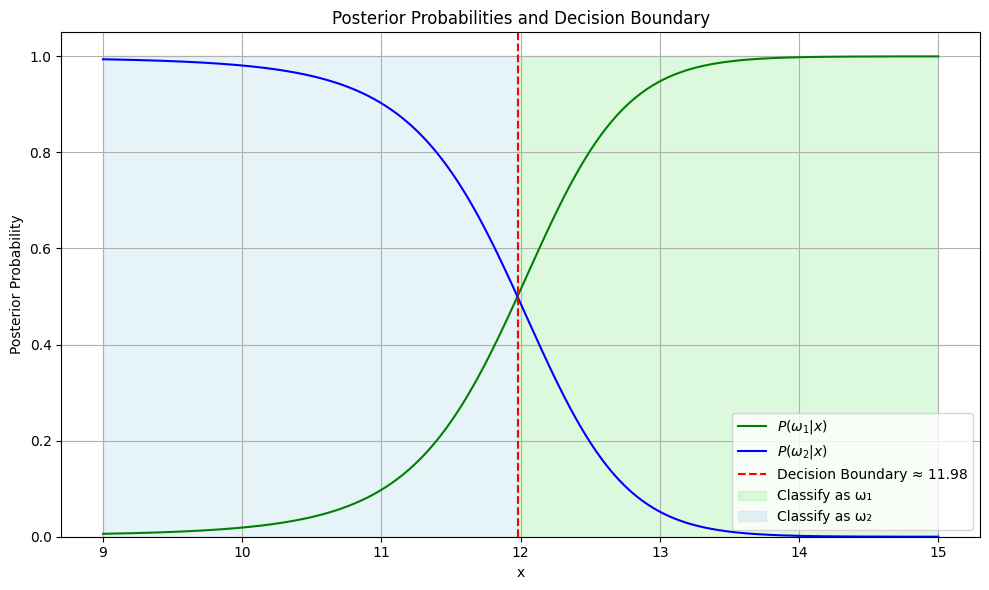

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the range of x values
x = np.linspace(9, 15, 1000)

# Class-conditional PDFs
p_x_given_w1 = norm.pdf(x, loc=13, scale=1)
p_x_given_w2 = norm.pdf(x, loc=11, scale=0.8)

# Prior probabilities (assume equal priors)
p_w1 = 0.5
p_w2 = 0.5

# Total probability P(x)
p_x = p_x_given_w1 * p_w1 + p_x_given_w2 * p_w2

# Posterior probabilities
p_w1_given_x = (p_x_given_w1 * p_w1) / p_x
p_w2_given_x = (p_x_given_w2 * p_w2) / p_x

# Find decision boundary (where posteriors are equal)
decision_index = np.argmin(np.abs(p_w1_given_x - p_w2_given_x))
decision_boundary = x[decision_index]

# Plot
plt.figure(figsize=(10, 6))

# Plot posterior probabilities
plt.plot(x, p_w1_given_x, label=r'$P(\omega_1|x)$', color='green', linestyle='-')
plt.plot(x, p_w2_given_x, label=r'$P(\omega_2|x)$', color='blue', linestyle='-')

# Decision boundary line
plt.axvline(decision_boundary, color='red', linestyle='--', label=f'Decision Boundary ≈ {decision_boundary:.2f}')

# Shade regions based on classification
plt.fill_between(x, 0, 1, where=(p_w1_given_x > p_w2_given_x), color='lightgreen', alpha=0.3, label='Classify as ω₁')
plt.fill_between(x, 0, 1, where=(p_w2_given_x > p_w1_given_x), color='lightblue', alpha=0.3, label='Classify as ω₂')

# Labels and legends
plt.title("Posterior Probabilities and Decision Boundary")
plt.xlabel("x")
plt.ylabel("Posterior Probability")
plt.ylim([0, 1.05])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


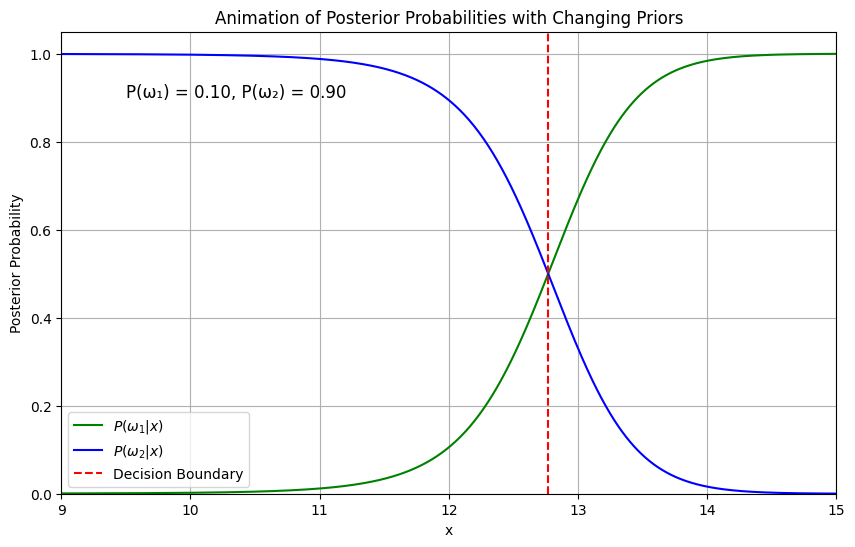

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.animation import FuncAnimation

# Setup
x = np.linspace(9, 15, 1000)
p_x_given_w1 = norm.pdf(x, loc=13, scale=1)
p_x_given_w2 = norm.pdf(x, loc=11, scale=0.8)

# Create figure and lines
fig, ax = plt.subplots(figsize=(10, 6))
line_w1_post, = ax.plot([], [], label=r'$P(\omega_1|x)$', color='green')
line_w2_post, = ax.plot([], [], label=r'$P(\omega_2|x)$', color='blue')
boundary_line = ax.axvline(x=0, color='red', linestyle='--', label='Decision Boundary')
text = ax.text(9.5, 0.9, '', fontsize=12)

ax.set_xlim(9, 15)
ax.set_ylim(0, 1.05)
ax.set_title("Animation of Posterior Probabilities with Changing Priors")
ax.set_xlabel("x")
ax.set_ylabel("Posterior Probability")
ax.legend()
ax.grid(True)

# Update function
def update(frame):
    p_w1 = frame
    p_w2 = 1 - p_w1

    p_x = p_x_given_w1 * p_w1 + p_x_given_w2 * p_w2
    p_w1_given_x = (p_x_given_w1 * p_w1) / p_x
    p_w2_given_x = (p_x_given_w2 * p_w2) / p_x

    # Update lines
    line_w1_post.set_data(x, p_w1_given_x)
    line_w2_post.set_data(x, p_w2_given_x)

    # Update decision boundary
    decision_index = np.argmin(np.abs(p_w1_given_x - p_w2_given_x))
    decision_boundary = x[decision_index]
    boundary_line.set_xdata([decision_boundary, decision_boundary])

    text.set_text(f'P(ω₁) = {p_w1:.2f}, P(ω₂) = {p_w2:.2f}')
    return line_w1_post, line_w2_post, boundary_line, text

# Animate
priors = np.linspace(0.1, 0.9, 40)
ani = FuncAnimation(fig, update, frames=priors, interval=200, blit=True)
plt.show()
ani.save('posterior_decision_animation.gif', writer='pillow')


![Posterior vs Likelihood](posterior_decision_animation.gif)

### Check the GIF to see the animation to visualize the things

# How the posterior probabilities and decision boundary change when we change the likelihood, i.e., the shape of the class-conditional distributions.

## Varying Standard Deviation of $P(x|\omega_1)$ and Observing Changes

We will investigate the effects of varying the standard deviation of the likelihood function $P(x|\omega_1)$ while keeping $P(x|\omega_2)$ fixed. We aim to observe the resulting changes in:

1.  **The likelihood $P(x|\omega_1)$ itself:** How does the shape and spread of the distribution change?
2.  **The posteriors $P(\omega_1|x)$ and $P(\omega_2|x)$:** How does the probability of a sample belonging to each class change as we vary the likelihood?
3.  **The decision boundary:** How does the point at which we switch classification decisions move?

**Setup:**

Let's assume that both $P(x|\omega_1)$ and $P(x|\omega_2)$ are Gaussian distributions:

* $P(x|\omega_1) = \mathcal{N}(x|\mu_1, \sigma_1^2)$
* $P(x|\omega_2) = \mathcal{N}(x|\mu_2, \sigma_2^2)$

We will keep $\mu_1$, $\mu_2$, and $\sigma_2$ constant, and vary $\sigma_1$.

**Expected Observations:**

1.  **Likelihood $P(x|\omega_1)$:**
    * As $\sigma_1$ increases, the distribution will become wider and flatter, indicating a higher uncertainty in the values of $x$ belonging to class $\omega_1$.
    * As $\sigma_1$ decreases, the distribution will become narrower and taller, indicating a higher confidence in the values of $x$ belonging to class $\omega_1$.

2.  **Posteriors $P(\omega_1|x)$ and $P(\omega_2|x)$:**
    * The posteriors are calculated using Bayes' theorem:
        * $P(\omega_1|x) = \frac{P(x|\omega_1)P(\omega_1)}{P(x)}$
        * $P(\omega_2|x) = \frac{P(x|\omega_2)P(\omega_2)}{P(x)}$
        * Where $P(x) = P(x|\omega_1)P(\omega_1) + P(x|\omega_2)P(\omega_2)$ and $P(\omega_1)$, $P(\omega_2)$ are the prior probabilities.
    * Varying $\sigma_1$ will affect $P(x|\omega_1)$, which in turn will affect the posteriors.
    * If $\sigma_1$ increases, the influence of $P(x|\omega_1)$ on the posteriors will become more spread out, impacting a wider range of $x$ values.
    * If $\sigma_1$ decreases, the influence of $P(x|\omega_1)$ on the posteriors will become more concentrated, impacting a narrower range of $x$ values.

3.  **Decision Boundary:**
    * The decision boundary is the point where $P(\omega_1|x) = P(\omega_2|x)$.
    * As $\sigma_1$ changes, the shape of $P(\omega_1|x)$ will change relative to $P(\omega_2|x)$, causing the decision boundary to shift.
    * If $\sigma_1$ is larger, the decision boundary will move towards the mean of the distribution with the smaller standard deviation.
    * If $\sigma_1$ is smaller, the decision boundary will move towards the mean of the distribution with the larger standard deviation.
    * The degree of movement will depend on the relationship between $\mu_1$, $\mu_2$, $\sigma_1$, and $\sigma_2$.

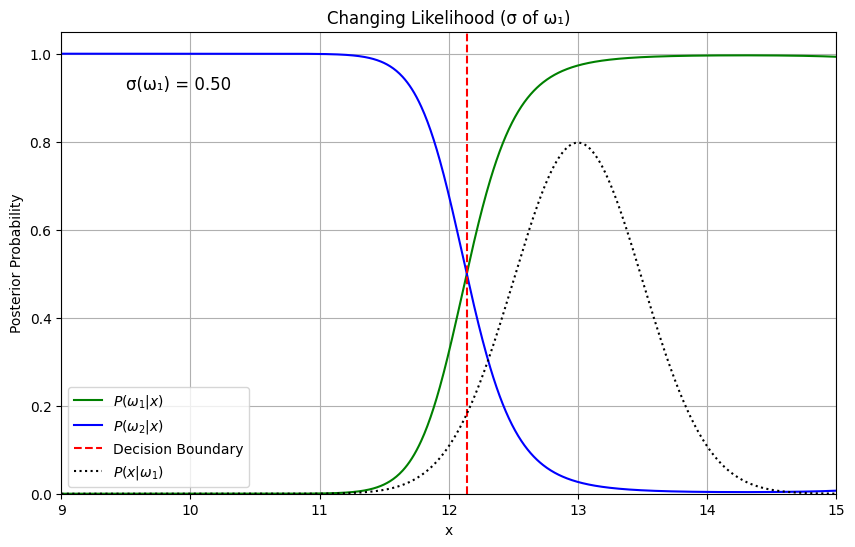

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.animation import FuncAnimation

# Range of x
x = np.linspace(9, 15, 1000)

# Fixed distribution for ω2
p_x_given_w2 = norm.pdf(x, loc=11, scale=0.8)

# Prior probabilities
p_w1 = 0.5
p_w2 = 0.5

# Setup plot
fig, ax = plt.subplots(figsize=(10, 6))
line_post_w1, = ax.plot([], [], label=r'$P(\omega_1|x)$', color='green')
line_post_w2, = ax.plot([], [], label=r'$P(\omega_2|x)$', color='blue')
boundary_line = ax.axvline(x=0, color='red', linestyle='--', label='Decision Boundary')
like_line, = ax.plot([], [], color='black', linestyle=':', label=r'$P(x|\omega_1)$')
text = ax.text(9.5, 0.92, '', fontsize=12)

ax.set_xlim(9, 15)
ax.set_ylim(0, 1.05)
ax.set_title("Changing Likelihood (σ of ω₁)")
ax.set_xlabel("x")
ax.set_ylabel("Posterior Probability")
ax.legend()
ax.grid(True)

# Update function
def update(std_dev):
    # New likelihood for ω1
    p_x_given_w1 = norm.pdf(x, loc=13, scale=std_dev)
    like_line.set_data(x, p_x_given_w1)

    # Total P(x)
    p_x = p_x_given_w1 * p_w1 + p_x_given_w2 * p_w2

    # Posterior probabilities
    p_w1_given_x = (p_x_given_w1 * p_w1) / p_x
    p_w2_given_x = (p_x_given_w2 * p_w2) / p_x

    # Update plots
    line_post_w1.set_data(x, p_w1_given_x)
    line_post_w2.set_data(x, p_w2_given_x)

    # Decision boundary
    decision_index = np.argmin(np.abs(p_w1_given_x - p_w2_given_x))
    decision_boundary = x[decision_index]
    boundary_line.set_xdata([decision_boundary, decision_boundary])

    text.set_text(f'σ(ω₁) = {std_dev:.2f}')
    return line_post_w1, line_post_w2, boundary_line, like_line, text

# Std deviations to vary ω₁
std_vals = np.linspace(0.5, 2.0, 50)

# Animate
ani = FuncAnimation(fig, update, frames=std_vals, interval=200, blit=True)
plt.show()
ani.save("posterior_vs_likelihood.gif", writer="pillow", fps=5)

![Posterior vs Likelihood](posterior_vs_likelihood.gif)